# Capstone 1: White Wine Quality

<b>Audrey Hughes Rager</b><br>
<b>Springboard Data Science Career Track Certificate</b><br>
October, 2021
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)








## Introduction

## Import Python Packages

In [76]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import scale
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Import Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')
# Import Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# Import StandardScalar and LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Import precision_recall_curve
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
# Import average_precision_score
from sklearn.metrics import average_precision_score
# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
#import roc_curve
from sklearn.metrics import roc_curve

from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

#Import Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



sns.set_style('whitegrid')



%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

The white wine data were imported into a Pandas dataframe using the pd.csv_read() function with a sep=’;’ option because the data values were separated with a semicolon instead of a comma. No null values were detected. There were a few outliers that were left in because the Random Forest Regression and Classifier methods used in this analysis are robust enough to deal with them.



### Import data

In [2]:
#Import csv files into Pandas data frames
#whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('../data/winequality-white.csv',sep=";")


### Check for null values



In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values.

### Inspect data

In [4]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## EDA

### Histograms

[Text(0.5, 1.0, 'White Wine Quality')]

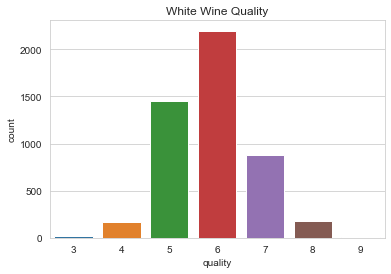

In [6]:
#Histogram of Wine Quality with Seaborn

sns.countplot(x='quality', data=df).set(title='White Wine Quality')
#count_plot = sns.countplot(x='quality', data=df)
#count_plot.figure.savefig("001aQualityHist.png")

In [7]:

df.groupby(['quality']).size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [8]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
for i in qual_list:
    proportion = quant_list[j]/ n
    percentage = round((proportion*100),2)
    print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; " + str(percentage)+"%") 
    #print(j)
    j += 1
   

quality 3; n = 20; 0.41%
quality 4; n = 163; 3.33%
quality 5; n = 1457; 29.75%
quality 6; n = 2198; 44.88%
quality 7; n = 880; 17.97%
quality 8; n = 175; 3.57%
quality 9; n = 5; 0.1%


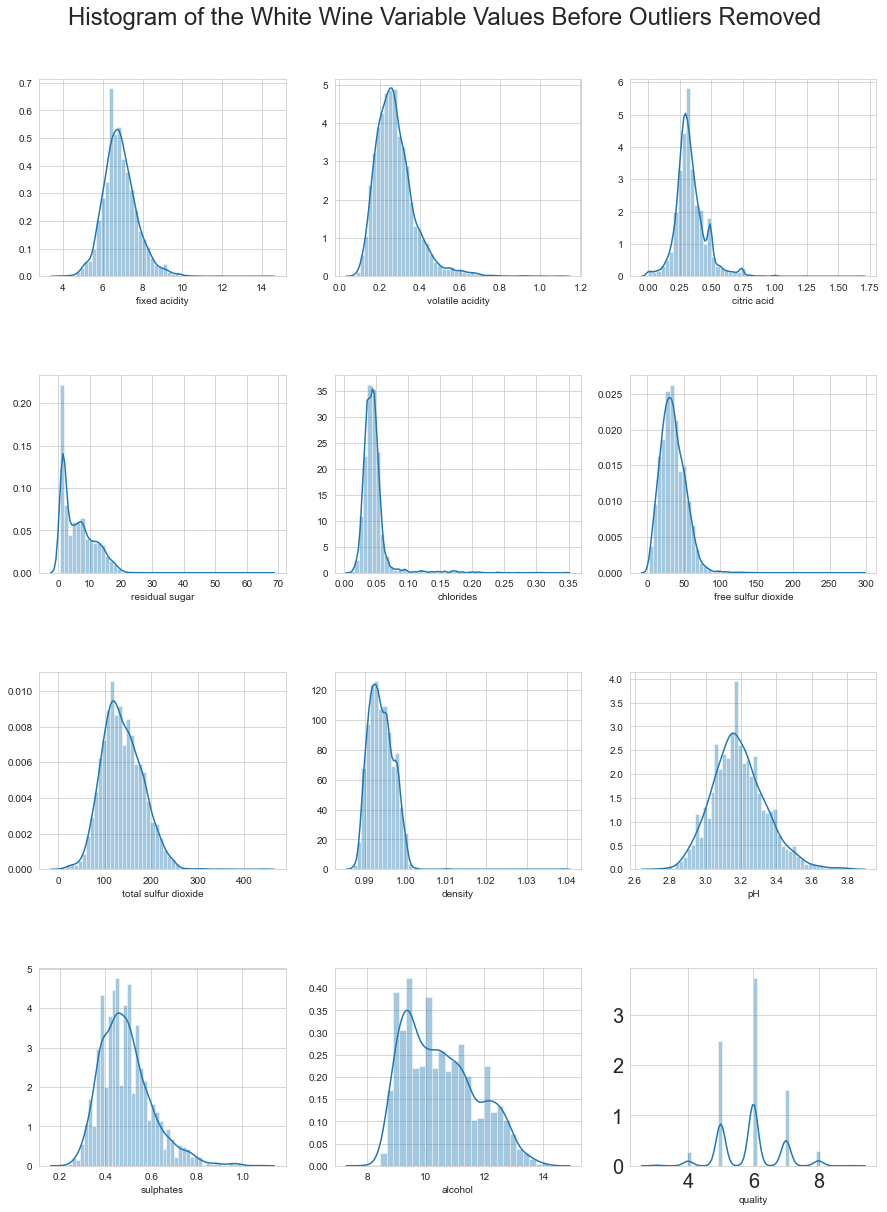

In [9]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)

    plt.show()

plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values Before Outliers Removed")




### Boxplots

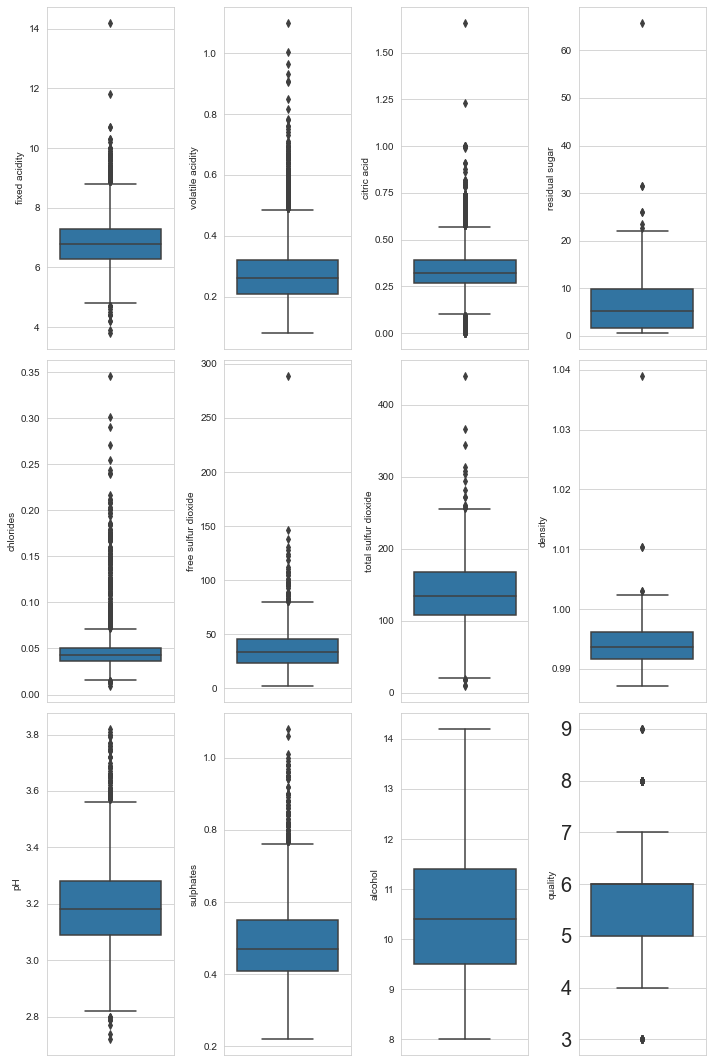

In [10]:
#Boxplots
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 15, width = 10):
    # Create a figure instance, and the subplot
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.tight_layout()
    plt.show()
    

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4,title=None)

#myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")


### Computing Skewness

In [11]:
plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skew")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness')

skewness_check(df[plot_columns])

White Wine Skewness


Column  Skewness   Skew Category
0          fixed acidity  0.647553  Heavily Skewed
1       volatile acidity  1.576497  Heavily Skewed
2            citric acid  1.281528  Heavily Skewed
3         residual sugar  1.076764  Heavily Skewed
4              chlorides  5.021792  Heavily Skewed
5    free sulfur dioxide  1.406314  Heavily Skewed
6   total sulfur dioxide  0.390590      Light Skew
7                density  0.977474  Heavily Skewed
8                     pH  0.457642      Light Skew
9              sulphates  0.976894  Heavily Skewed
10               alcohol  0.487193      Light Skew
11               quality  0.155749      Light Skew

#### Observations regarding White Wine variables

<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.
    <li>Although there are outliers in the data, nothing in Cortez et al. 2009, suggests that these values are erroneous. Therefore, the outliers will be left in the data.


</ul>

 

### Correlation Matrices
#### Spearman

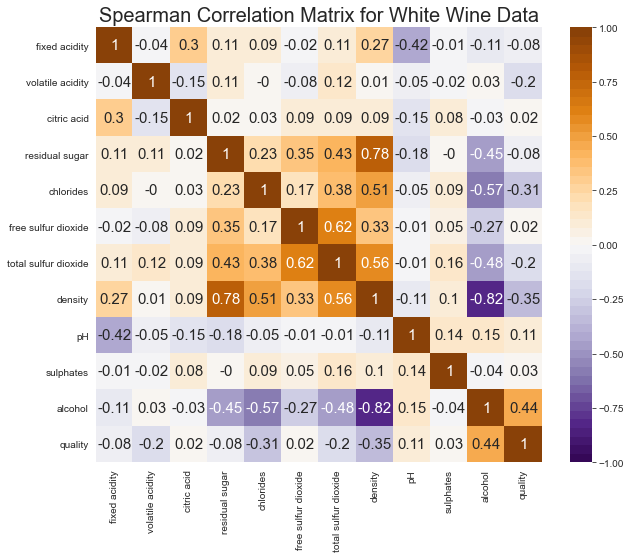

In [12]:
def confusion_matrix_plot(data, title = "Spearman Correlation Matrix for Wine Data Before Outliers Removed", height = 8, width = 10):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Spearman Correlation Matrix for White Wine Data")






In [13]:
print("Spearman")
df.corr(method ="spearman")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.440369
pH                      0.109362
sulphates               0.033319
free sulfur dioxide     0.023713
citric acid             0.018333
residual sugar         -0.082070
fixed acidity          -0.084485
volatile acidity       -0.196562
total sulfur dioxide   -0.196680
chlorides              -0.314488
density                -0.348351
Name: quality, dtype: float64

#### Pearson's

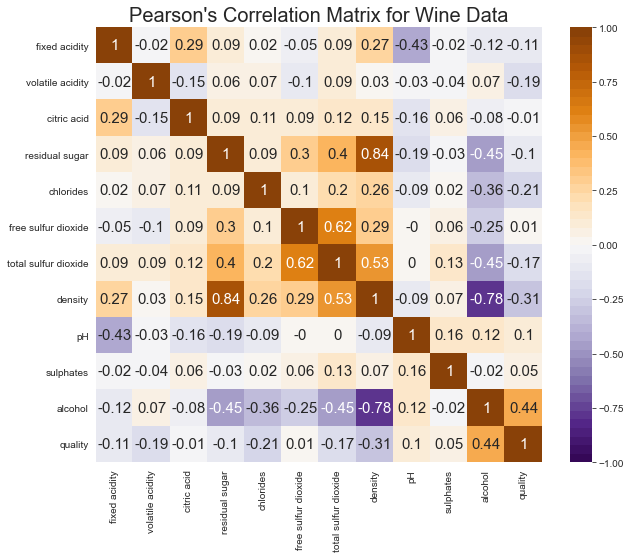

In [14]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 8, width = 10):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [15]:
print("Spearman")
df.corr(method ="pearson")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

#### Kendall

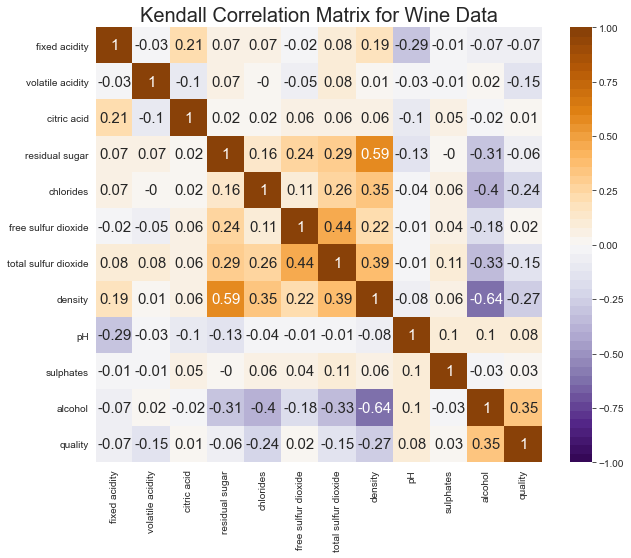

In [16]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 8, width = 10):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [17]:
print("Kendall")
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

Kendall


quality                 1.000000
alcohol                 0.346672
pH                      0.084441
sulphates               0.026403
free sulfur dioxide     0.017164
citric acid             0.014557
residual sugar         -0.063087
fixed acidity          -0.065474
total sulfur dioxide   -0.151230
volatile acidity       -0.154787
chlorides              -0.244856
density                -0.266598
Name: quality, dtype: float64

### Scatterplots of Predictors

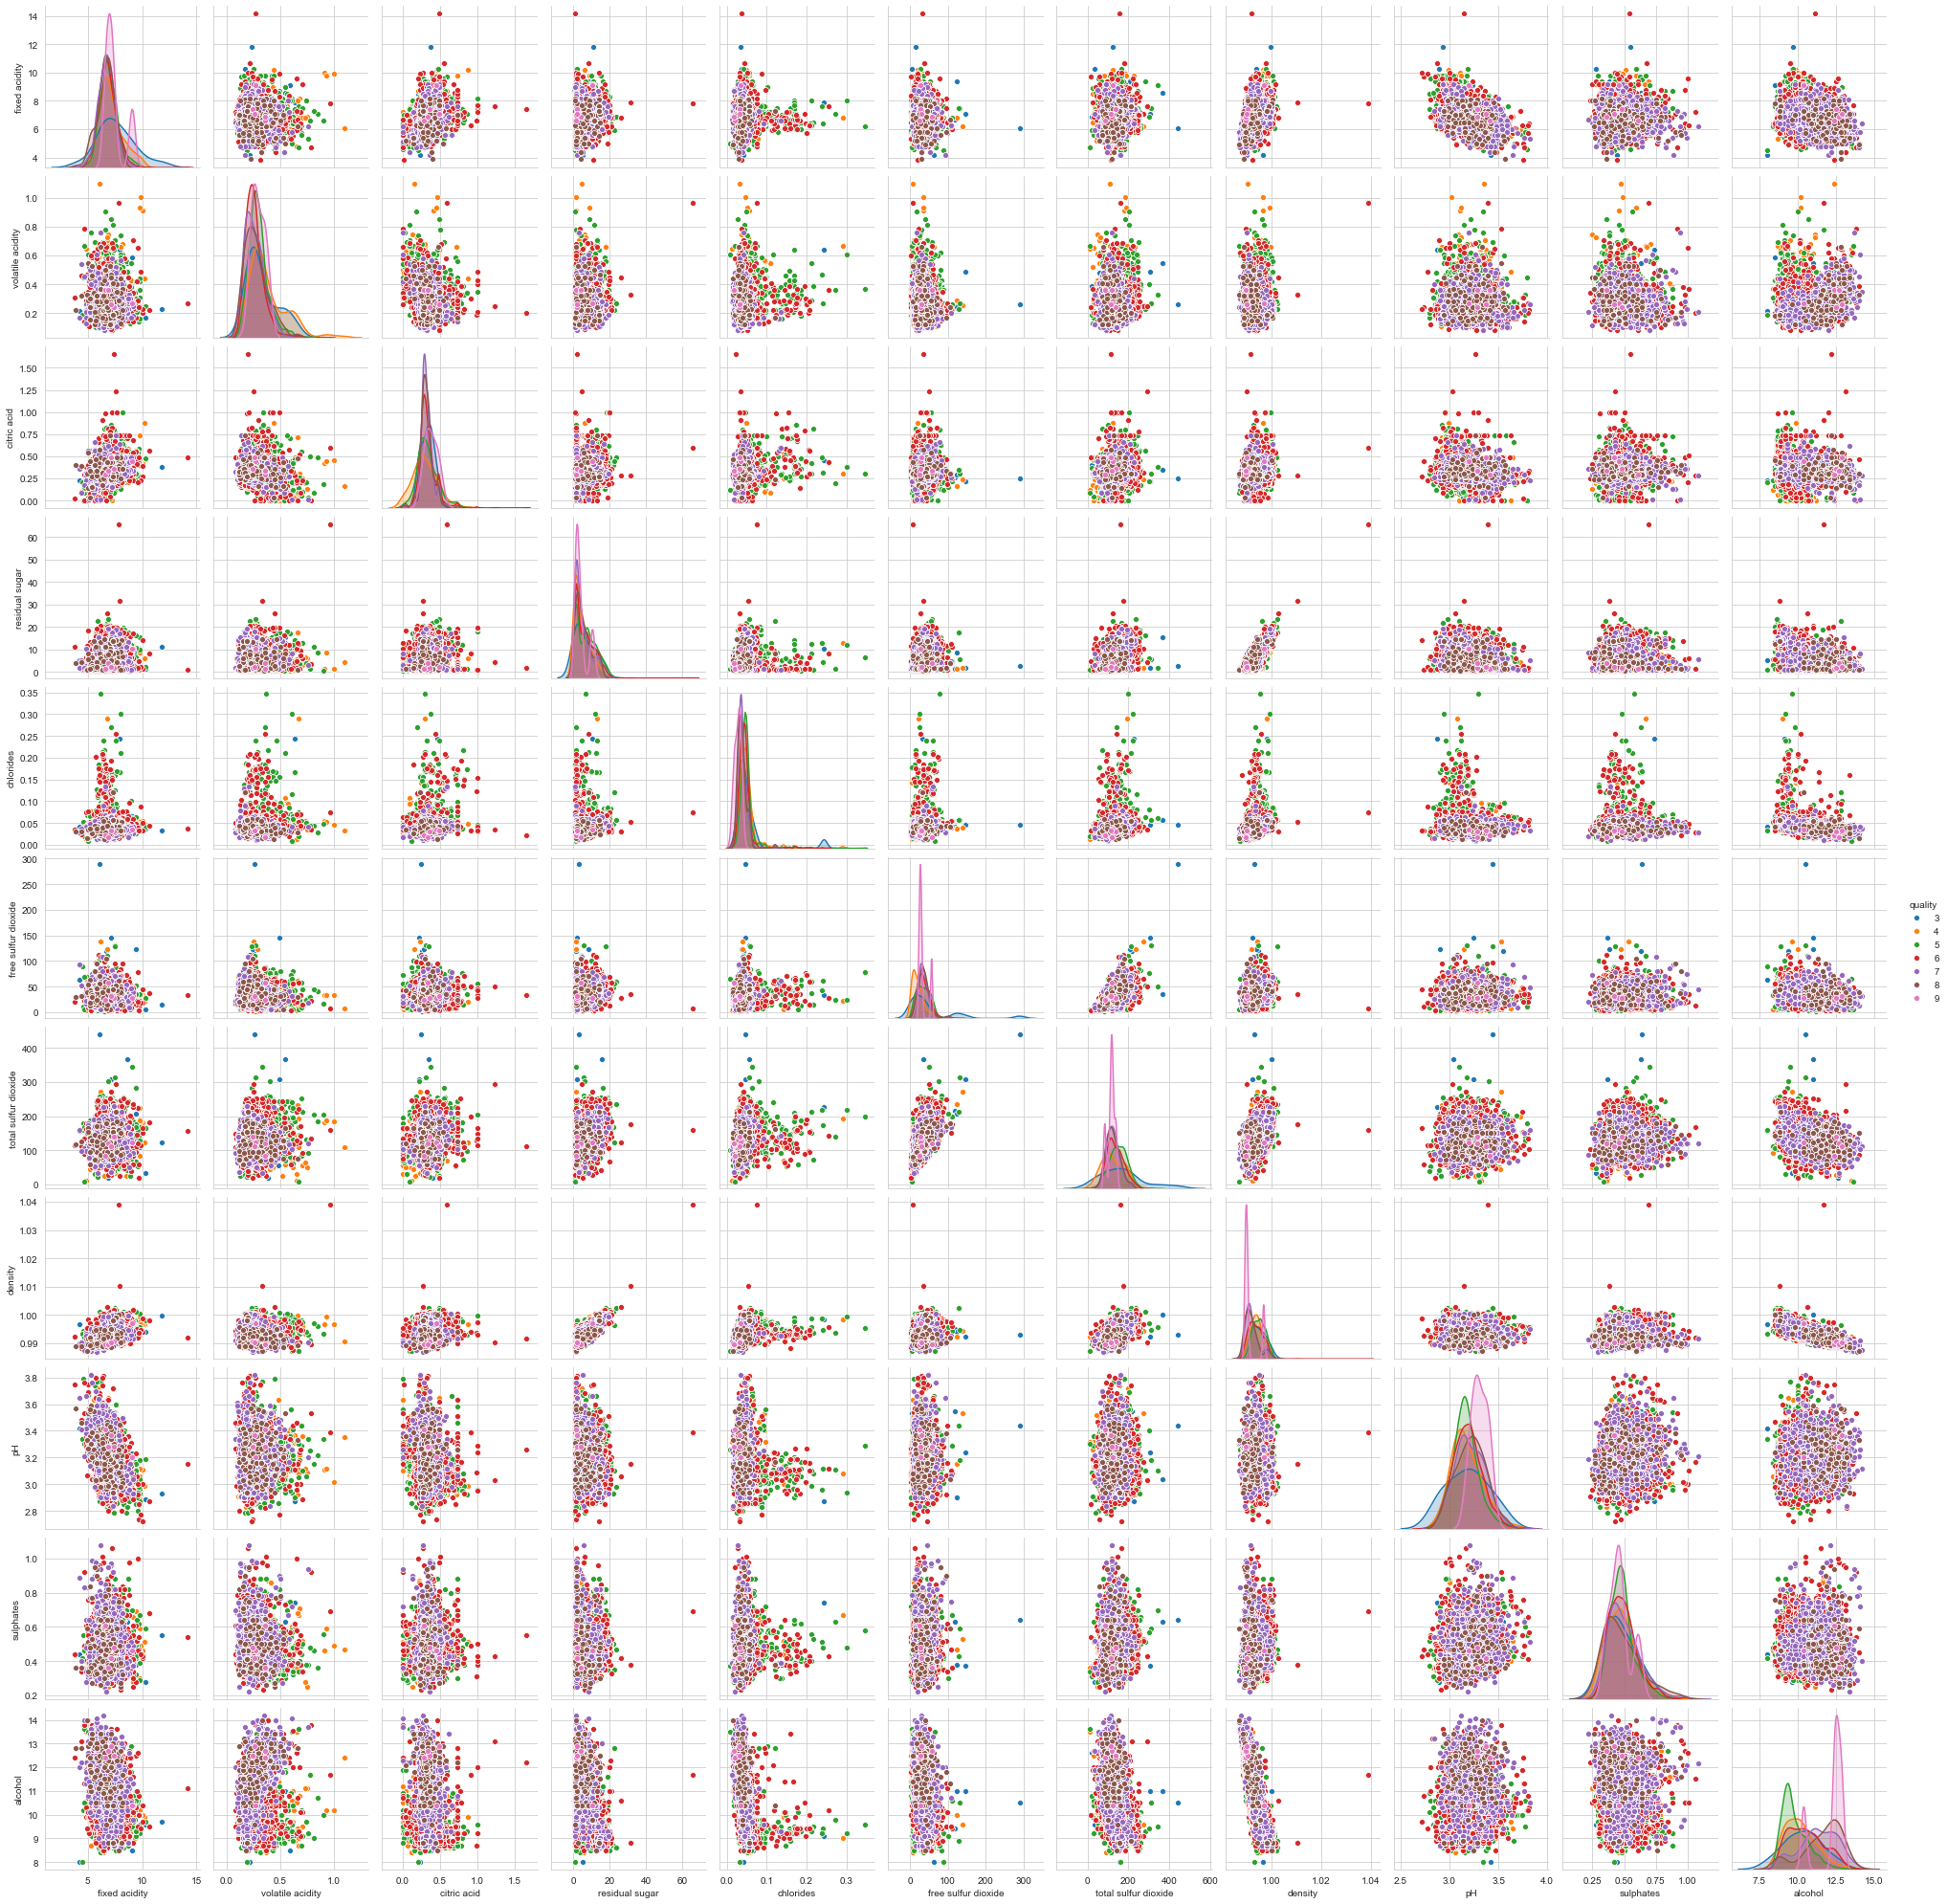

In [18]:
#sns.pairplot(df,hue='quality')


pair_plot = sns.pairplot(df,hue='quality')
pair_plot.savefig("001aPairPlot.png")


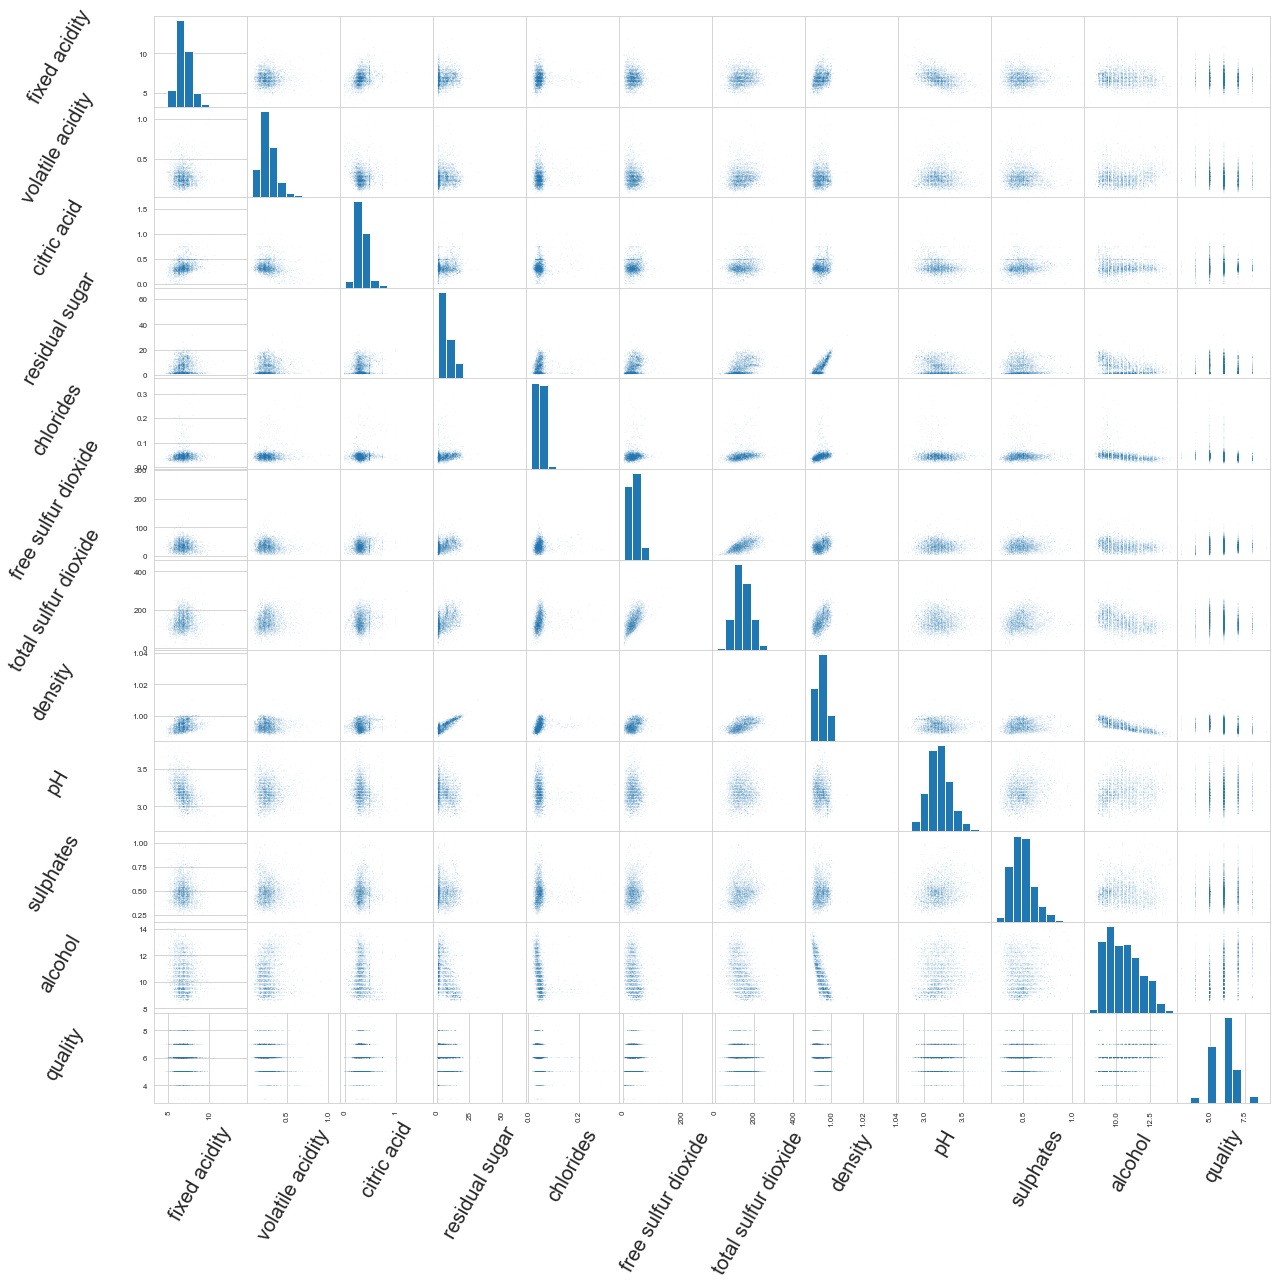

In [19]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
plt.savefig("001aScatterMatrix.png")
    

<h3>1. Alcohol</h3>

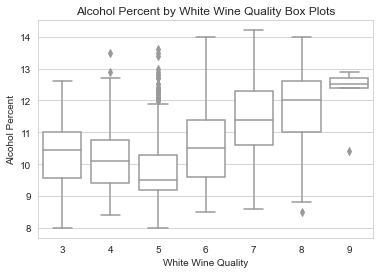

In [20]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_alcohol.png")

<h3>2. Density</h3>  

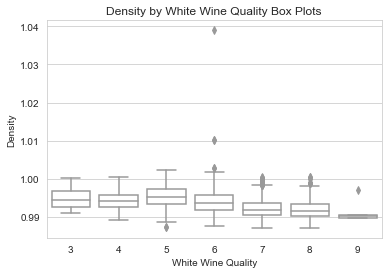

In [21]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_density.png")


<h3>3. Chlorides</h3>    

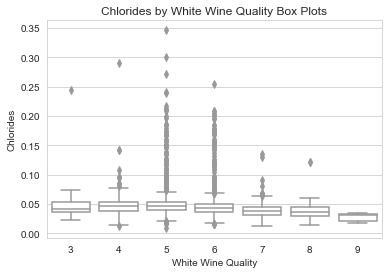

In [22]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_chlorides.png")

<h3>4. Volatile Acidity</h3>      

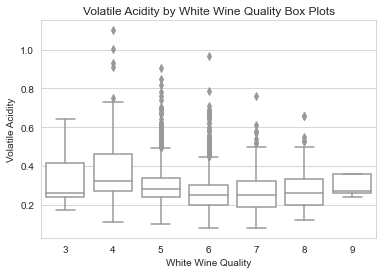

In [23]:
#Quality by Volatile Acidity


myAttribute = 'volatile acidity'
myYLabel = 'Volatile Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_volatile.png")
 

<h3>5. Citric Acid</h3>

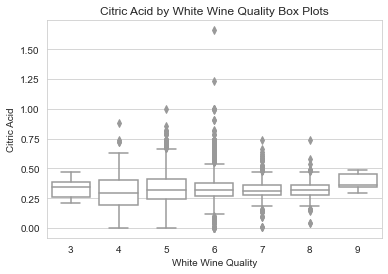

In [24]:
#Quality by Citric Acid

myAttribute = 'citric acid'
myYLabel = 'Citric Acid'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_citricacid.png")
 

<h3>6. Fixed Acidity</h3>  

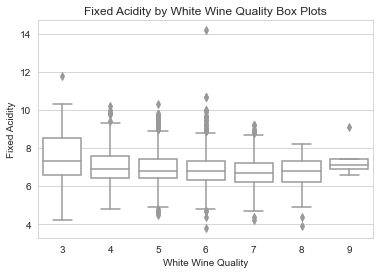

In [25]:
#Quality by Fixed Acidity

myAttribute = 'fixed acidity'
myYLabel = 'Fixed Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_fixedacidity.png")


<h3>7. Free Sulfur Dioxide</h3>  

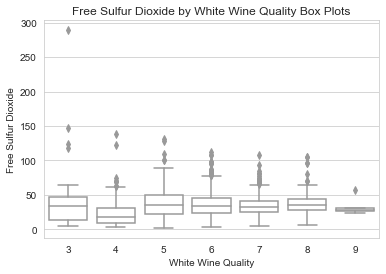

In [26]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free sulfur dioxide'
myYLabel = 'Free Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_freesulfurdioxide.png")


<h3>8. Total Sulfur Dioxide</h3> 

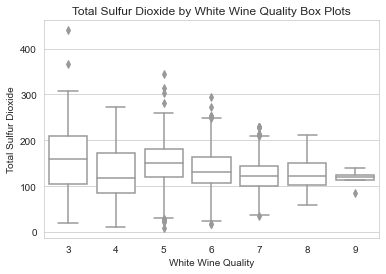

In [27]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total sulfur dioxide'
myYLabel = 'Total Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_totalsulfurdioxide.png")


<h3>9. pH</h3> 

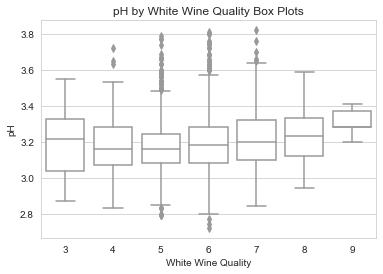

In [28]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_pH.png")
 

<h3>10. Sulphates</h3>

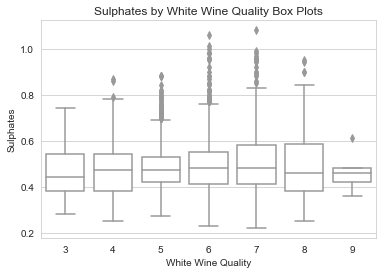

In [29]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_sulphates.png")


<h3>11. Residual Sugar</h3>

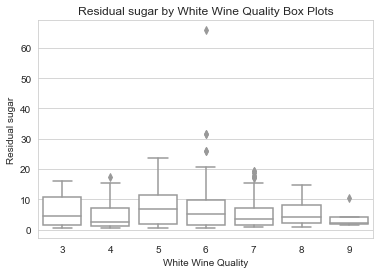

In [30]:
#Quality by Residual Sugar

myAttribute = 'residual sugar'
myYLabel = 'Residual sugar'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')

bx.figure.savefig("001a_residualsugar.png")


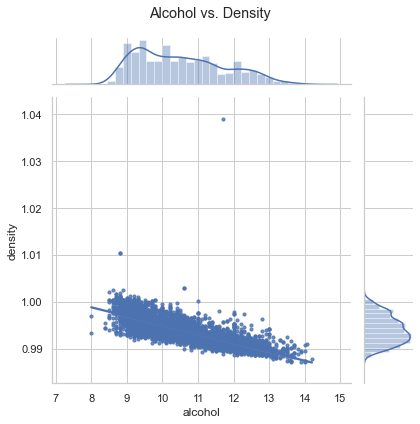

In [31]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Alcohol vs. Density")
p.fig.tight_layout()
plt.show()

p.savefig("001a_alcohol_vs_density.png")


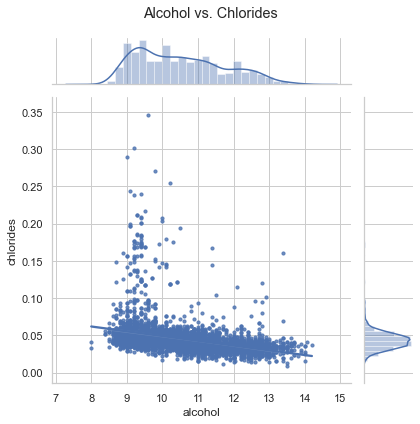

In [32]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='alcohol', y='chlorides',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Alcohol vs. Chlorides")
p.fig.tight_layout()
plt.show()

p.savefig("001a_alcohol_vs_chlorides.png")

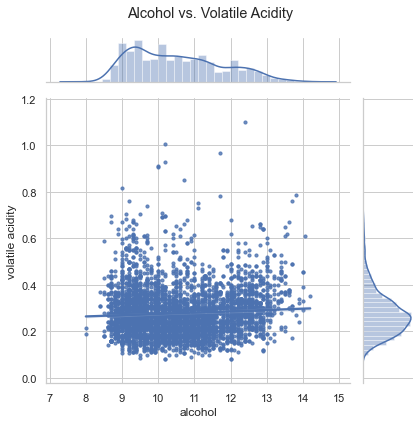

In [33]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='alcohol', y='volatile acidity',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Alcohol vs. Volatile Acidity")
p.fig.tight_layout()
plt.show()

p.savefig("001a_alcohol_vs_volatileacidity.png")

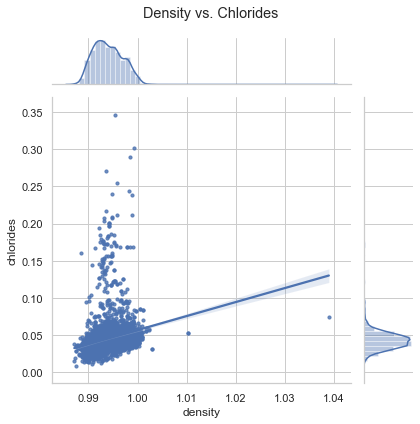

In [34]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='density', y='chlorides',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Density vs. Chlorides")
p.fig.tight_layout()
plt.show()

p.savefig("001a_density_vs_chlorides.png")

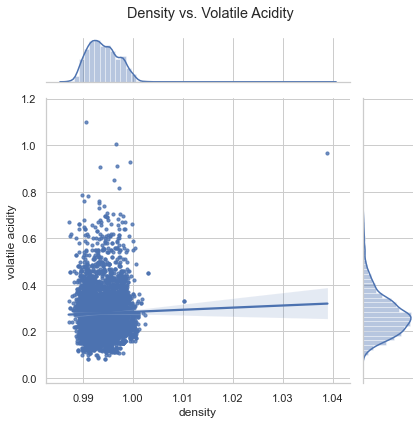

In [35]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='density', y='volatile acidity',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Density vs. Volatile Acidity")
p.fig.tight_layout()
plt.show()

p.savefig("001a_density_vs_volatileacidity.png")

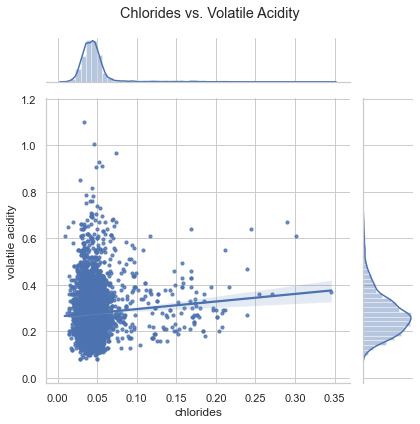

In [36]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
p = sns.jointplot(data=df,x='chlorides', y='volatile acidity',  kind='reg',scatter_kws={'s':10})
p.fig.suptitle("Chlorides vs. Volatile Acidity")
p.fig.tight_layout()
plt.show()

p.savefig("001a_chlorides_vs_volatileacidity.png")

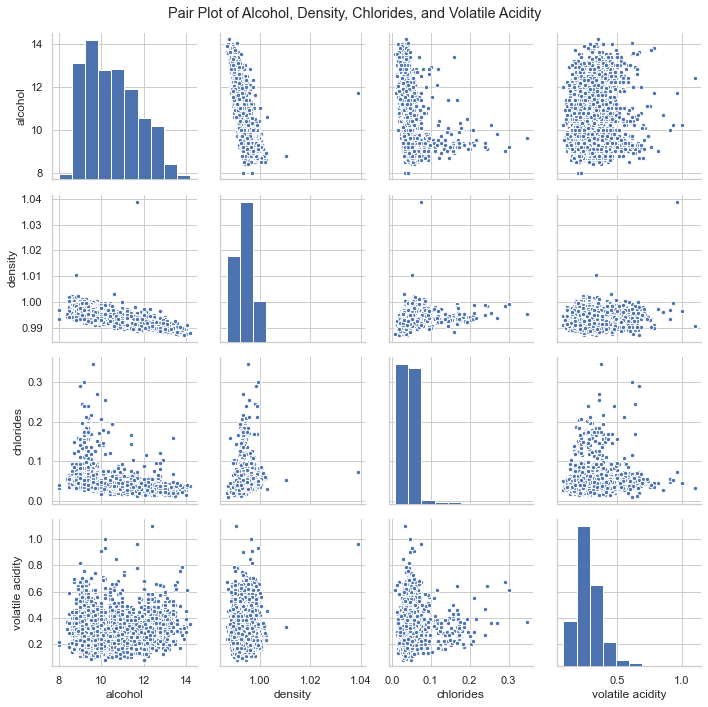

In [37]:

data = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]

#sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

g = sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))
g.fig.suptitle("Pair Plot of Alcohol, Density, Chlorides, and Volatile Acidity")
g.fig.tight_layout()

g.savefig("001a_select_pairplot.png")


## Random Forest Regressor

### Set X and Y variables

In [38]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [39]:
X.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


### Train-Test-Split

In [41]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)




### Import Regression Metrics

In [42]:
# import regression metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

### Hyperparameter Tuning

In [61]:
# use gridsearch cv to hyper parameter tune a random forest regressor model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [62]:
search_model.best_estimator_

RandomForestRegressor(n_estimators=700, random_state=42)

In [63]:
# hyper parameter tune "minimum samples per leaf" and "max_depth"

# instantiating random forest model
gsModel = RandomForestRegressor(random_state=42, n_estimators=700, n_jobs=-1)

# what parameter to search for best estimator
params = {'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
          'max_depth': [3, 5, 10, 15, 20, 25]
         }

# instatiating our grid search cv model

search_rfr = GridSearchCV(estimator=gsModel, 
                      param_grid = params,
                      n_jobs = -1)

# fit our grid search model to our dataframe

search_modelrfr = search_rfr.fit(X_train, y_train)

print(f'best search params: {search_modelrfr.best_params_}')

y_pred_searchrfr = search_modelrfr.predict(X_test)

mae_searchrfr = mean_absolute_error(y_test, y_pred_search2)

mse_searchrfr = mean_squared_error(y_test, y_pred_search2)

print(f'Grid search mae: {mae_searchrfr}, Grid search mse: {mse_searchrfr}')

best search params: {'max_depth': 25, 'min_samples_leaf': 5}
Grid search mae: 0.4657677401322025, Grid search mse: 0.3846100055944693


In [56]:
# hyper parameter tuning

# instantiating random forest model
final_model = RandomForestRegressor(random_state=42, n_estimators=700, 
                                min_samples_leaf = 5,
                                max_depth = 25)


final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)

final_mae = mean_absolute_error(y_test, y_pred_final)

final_mse = mean_squared_error(y_test, y_pred_final)

print(f'Grid search mae: {final_mae}, Grid search mse: {final_mse}')

Grid search mae: 0.4657677401322025, Grid search mse: 0.38461000559446934


In [57]:
# explain random forest model

importance = final_model.feature_importances_
importance

array([0.05290156, 0.13950213, 0.05244326, 0.06101209, 0.05282576,
       0.11731315, 0.06014614, 0.05512024, 0.06158059, 0.0522338 ,
       0.29492128])

In [58]:
columns = X_train.columns

In [59]:
# series between columns and feature importances

rfrfinalGraph = pd.Series(importance, columns)
rfrfinalGraph

fixed acidity           0.052902
volatile acidity        0.139502
citric acid             0.052443
residual sugar          0.061012
chlorides               0.052826
free sulfur dioxide     0.117313
total sulfur dioxide    0.060146
density                 0.055120
pH                      0.061581
sulphates               0.052234
alcohol                 0.294921
dtype: float64

Text(0.5, 1.0, 'Final Random Forest Regressor Model Visualization')

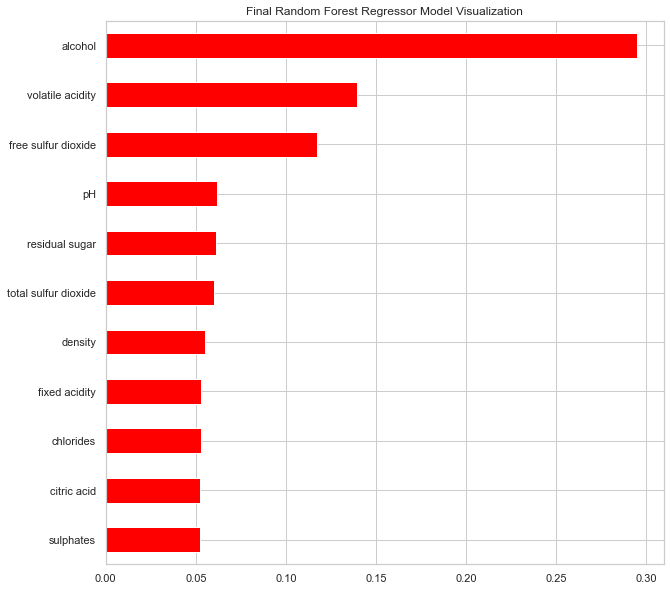

In [60]:
figure(figsize=(10,10))

rfrfinalGraph.sort_values().plot.barh(color="red")

plt.title("Final Random Forest Regressor Model Visualization")

## Random Forest Classifier

In [106]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

In [107]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

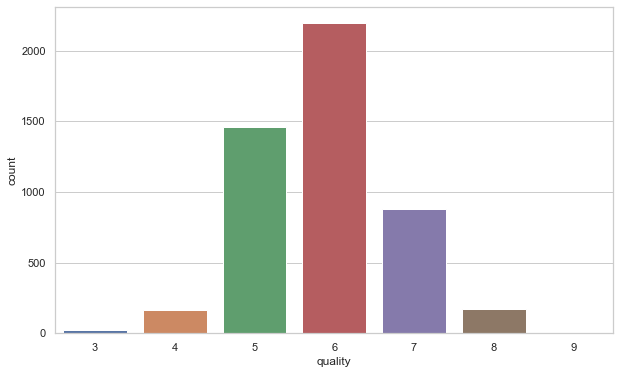

In [108]:
print(df['quality'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

### Bin Data: Two Classes

In [109]:
df_cl = pd.read_csv('../data/winequality-white.csv',sep=";")
df_cl = df_cl.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)
df_cl['qual_2cl'] = df['quality']


print("Dataset Shape: ", df.shape)

Dataset Shape:  (4898, 12)


In [110]:
#Preprocessing Data
#Reclassify the data into two bins, bad and good
# bin quality values using .cut()
bins = (2, 6.5, 9) #original
#bins = (3, 4.5, 6.5, 9.5) #test to see if I could separate it into three
group_names = ["bad", "good"]
#cutting out wine quality and replacing it
df_cl["qual_2cl"] = pd.cut(df_cl['qual_2cl'], bins = bins, labels = group_names)
df_cl.qual_2cl.value_counts()

bad     3838
good    1060
Name: qual_2cl, dtype: int64

In [111]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  qual_2cl              4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [112]:
df_cl.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality qual_2cl  
0      8.8        6      bad  
1      9.5        6      bad  
2     10.1        6      bad  
3      9.9        6      bad  
4      9.9        6      bad

In [113]:
df_cl["qual_2cl"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

bad     3838
good    1060
Name: qual_2cl, dtype: int64


<AxesSubplot:xlabel='qual_2cl', ylabel='count'>

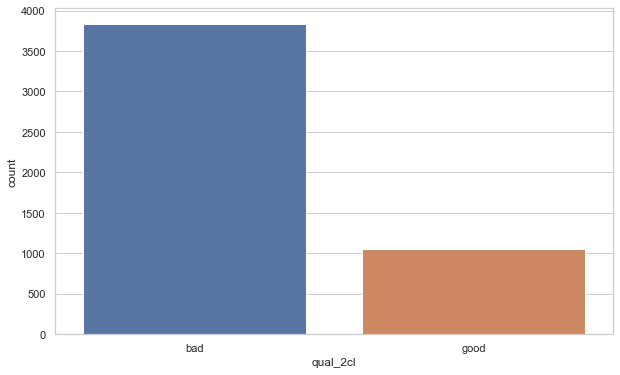

In [114]:
print(df_cl['qual_2cl'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(df_cl['qual_2cl'])

In [115]:
label_quality = LabelEncoder()
df_cl["qual_2cl"] = label_quality.fit_transform(df_cl["qual_2cl"])



### Train-Test Split

In [116]:
Xcl = df_cl.drop(['quality','qual_2cl'],axis=1)


ycl = df_cl['qual_2cl']

In [117]:
ycl.head()

0    0
1    0
2    0
3    0
4    0
Name: qual_2cl, dtype: int64

In [118]:
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(Xcl, ycl, test_size=0.30)


### Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=50)
rfc.fit(Xcl_train, ycl_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, n_estimators=500)

In [120]:
y_pred = rfc.predict(Xcl_test)

In [121]:
y_predtrain = rfc.predict(Xcl_train)

In [122]:


# instantiating random forest model
gsModel = RandomForestClassifier(random_state=42, n_estimators=700, n_jobs=-1)

# what parameter to search for best estimator
params = {'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
          'max_depth': [3, 5, 10, 15, 20, 25]
         }

# instatiating our grid search cv model

searchrfc = GridSearchCV(estimator=gsModel, 
                      param_grid = params,
                      n_jobs = -1)

# fit our grid search model to our dataframe

search_modelrfc = searchrfc.fit(Xcl_train, ycl_train)

print(f'best search params: {search_modelrfc.best_params_}')

ycl_pred_searchrfc = search_modelrfc.predict(Xcl_test)

mae_searchrfc = mean_absolute_error(y_test, y_pred_searchrfc)

mse_searchrfc = mean_squared_error(ycl_test, ycl_pred_searchrfc)

print(f'Grid search mae: {mae_searchrfc}, Grid search mse: {mse_searchrfc}')

best search params: {'max_depth': 15, 'min_samples_leaf': 5}
Grid search mae: 0.4122448979591837, Grid search mse: 0.15306122448979592


In [123]:
from sklearn.ensemble import RandomForestClassifier
rfcFinal = RandomForestClassifier(n_estimators=700, max_depth=25, min_samples_leaf=5,random_state=42, n_jobs=-1)
rfcFinal.fit(Xcl_train, ycl_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=700,
                       n_jobs=-1, random_state=42)

In [124]:
y_pred = rfcFinal.predict(Xcl_test)

In [125]:
y_predtrain = rfcFinal.predict(Xcl_train)

In [127]:
print(confusion_matrix(y_pred,y_predtrain))

ValueError: Found input variables with inconsistent numbers of samples: [1470, 3428]

In [128]:
print(confusion_matrix(y_train,y_predtrain))

ValueError: Found input variables with inconsistent numbers of samples: [3918, 3428]

In [129]:
print(classification_report(y_test,y_pred))
print("0 = bad")
print("1 = good")

ValueError: Found input variables with inconsistent numbers of samples: [980, 1470]

### Precision-Recall Curve


#### Compute the average precision score

In [130]:

average_precision = average_precision_score(ycl_test, ycl_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


NameError: name 'ycl_pred' is not defined

#### ROC Curve

In [ ]:
fpr, tpr, thresholds = roc_curve(ycl_test, ycl_pred)
roc_auc = metrics.auc(fpr, tpr)
disp2 = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='White Wine Quality')
disp2.plot()  
plt.show() 


In [ ]:
rfcimportance = rfc.feature_importances_
rfcimportance

In [ ]:
Xcl.columns

In [ ]:
rfccolumns = Xcl.columns

In [ ]:
# series between columns and feature importances

rfcGraph = pd.Series(rfcimportance, rfccolumns)
rfcGraph

In [ ]:
figure(figsize=(10,10))

rfcGraph.sort_values().plot.barh(color="red")

plt.title("random forest classifier model visualization")